### Question to address: Can we plot the bifurcation diagram given the multi-dimensionality of the system?

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import Parameters as prms


In [284]:
def process_summary_dict(ITMblood0_list, project_dir):
    sum_dict = {}
    for ITM in ITMblood0_list:
#         with (open(project_dir + str(ITM) + '.pickle', "rb")) as openfile:
#             print (ITM)
#             sum_dict[ITM] = pickle.load(openfile)
        sum_dict[ITM] = pd.read_pickle(project_dir + str(ITM) + '.pickle')
    return sum_dict    

In [285]:
def trim_points(dic, min_cut, max_cut = 5760, n=1):
    dic_trim = {}
    for key in dic.keys():
        df = dic[key]
        df = df[df.index % n == 0]
        df_trim = df[(df['Time']>=min_cut) & (df['Time']<=max_cut)]
        dic_trim[key] = df_trim
    return dic_trim

In [286]:
def extract_cells_from_summary(summary_dic, immune_cells, ITMblood0_list):
    cells_dic = {}
    for immune_cell in immune_cells:
        dic = {}
        for ITMs in ITMblood0_list:
            df = summary_dic[ITMs]
            dic[ITMs] = df[immune_cell].tolist()
        cells_dic[immune_cell] = pd.DataFrame(dic)
    return cells_dic

In [287]:
ITMblood0_list = [0, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5, 1e5, 1e6, 1e6, 1e7, 
                  5e7, 
                  1e8, 1.25e8, 1.5e8, 1.75e8, 2e8, 2.25e8, 2.5e8, 2.75e8, 
                  3e8, 3.25e8, 3.5e8, 3.75e8, 
                  4e8, 4.25e8, 4.5e8, 4.75e8, 5e8, 5.25e8, 5.5e8, 5.75e8, 
                  6e8, 6.25e8, 6.5e8, 6.75e8, 7e8, 7.25e8, 7.5e8, 7.75e8, 
                  8e8, 8.25e8, 8.5e8, 8.75e8, 9e8, 9.25e8, 9.5e8, 9.75e8, 1e9]

project_dir = "./result/timeseries/"

summary_dic = process_summary_dict(ITMblood0_list, project_dir)
# summary_dic
summary_trim_dic = trim_points(summary_dic, min_cut=2*24*60, n=40)

In [288]:
immune_cells = ['ITMtissue', 'ACH', 'CH', 'ND_A', 'ND_N', 'AP_Etissue']
cells_dic = extract_cells_from_summary(summary_trim_dic, immune_cells, ITMblood0_list)

In [289]:
summary_dic[0].columns

Index(['N_R', 'AP_Eblood', 'AP_Etissue', 'AP_Eliver', 'AP_Sblood',
       'AP_Stissue', 'ITMblood', 'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N', 'Time'],
      dtype='object')

In [290]:
# normalize features across everything

def rename(df, start):
    df.columns = [start+np.array(range(10))]
    
    return df

df1 = pd.DataFrame()

for i, ITM in enumerate(ITMblood0_list):
    df2 = summary_dic[ITM][['N_R', 'AP_Etissue',
        'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N']]
    df2 = rename(df2, i*10)
    
    df1 = pd.concat([df1,df2], axis=1)

df1

,0,1,2,3,4,5,6,7,8,9,...,510,511,512,513,514,515,516,517,518,519
0,2.500000e+03,1.246211e+08,350000.000000,1.500000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,2.500000e+03,1.246211e+08,3.500000e+05,1.500000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
1,2.496503e+03,1.245414e+08,259372.335287,4.596159e-04,149.994586,0.000000,0.000000e+00,3.304681e-25,0.105726,0.000000,...,2.496503e+03,1.245414e+08,2.593723e+05,4.596159e-04,149.994586,0.000000e+00,0.000000e+00,3.304681e-25,0.105726,0.000000
2,2.493012e+03,1.244799e+08,193910.409792,4.566519e-08,149.989740,0.000000,0.000000e+00,3.296044e-25,0.219189,0.000000,...,2.493012e+03,1.244799e+08,1.939104e+05,4.566519e-08,149.989740,0.000000e+00,0.000000e+00,3.296044e-25,0.219189,0.000000
3,2.489525e+03,1.244302e+08,147375.499119,1.192275e-08,149.984435,0.000000,0.000000e+00,3.287506e-25,0.332490,0.000000,...,2.489525e+03,1.244302e+08,1.473755e+05,1.192275e-08,149.984435,0.000000e+00,0.000000e+00,3.287506e-25,0.332490,0.000000
4,2.486044e+03,1.243884e+08,114289.629145,1.970880e-08,149.979130,0.000000,0.000000e+00,3.279020e-25,0.445628,0.000000,...,2.486044e+03,1.243884e+08,1.142896e+05,1.970880e-08,149.979130,0.000000e+00,0.000000e+00,3.279020e-25,0.445628,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5.700582e-18,2.505298e+07,16838.903357,2.496869e-03,114.337383,843672.332117,-8.277106e-20,3.168756e-09,97.273630,2.987496,...,4.715260e-18,2.145162e+01,3.479603e+07,1.232422e-06,114.404052,2.353322e+08,5.082534e-23,3.162526e-09,97.299881,2.986552
9996,5.673719e-18,2.505415e+07,16833.075809,2.497873e-03,114.335102,843356.267193,-7.952010e-20,3.162500e-09,97.224445,2.986513,...,4.692691e-18,2.146990e+01,3.479558e+07,1.232516e-06,114.401804,2.353309e+08,5.058260e-23,3.156279e-09,97.250710,2.985568
9997,5.646984e-18,2.505532e+07,16827.250461,2.498878e-03,114.332821,843040.329050,-7.633289e-20,3.156258e-09,97.175327,2.985529,...,4.670229e-18,2.148821e+01,3.479512e+07,1.232610e-06,114.399556,2.353296e+08,5.034100e-23,3.150045e-09,97.201606,2.984584
9998,5.620376e-18,2.505649e+07,16821.427313,2.499883e-03,114.330541,842724.517637,-7.321174e-20,3.150027e-09,97.126275,2.984546,...,4.647875e-18,2.150656e+01,3.479467e+07,1.232704e-06,114.397308,2.353283e+08,5.010054e-23,3.143824e-09,97.152569,2.983601


In [291]:
x = StandardScaler().fit_transform(df1)
x[:, 0:10].shape

(10000, 10)

In [292]:

def do_pca(ITM, i):
    x = summary_dic[ITM][['N_R', 'AP_Eblood', 'AP_Etissue',
        'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N']]
    x = StandardScaler().fit_transform(x) # normalizing the features
#     x = x[:, i*10:i*10+10]
    
    pca_immune = PCA(n_components=1)
    principalComponents_immune = pca_immune.fit_transform(x)
    return principalComponents_immune


In [293]:
ITMblood0_list_trim = [0, 1e8, 1.5e8,
                       2e8, 2.5e8, 
                       3e8, 3.5e8, 
                       4e8, 4.5e8, 
                       5e8,  5.5e8,
                       6e8, 6.5e8, 
                       7e8, 7.5e8, 
                       8e8, 8.5e8, 
                       9e8, 9.5e8, 
                       1e9]

In [294]:
ITMblood0_list_names = ['0', '9.5e7', '1e8', '1.5e8',
                       '2e8', '2.5e8', 
                       '3e8', '3.5e8', 
                       '4e8', '4.5e8', 
                       '5e8',  '5.5e8',
                       '6e8', '6.5e8', 
                       '7e8', '7.5e8', 
                       '8e8', '8.5e8', 
                       '9e8', '9.5e8', 
                       '1e9']

In [ ]:
t = [prms._stoptime * float(i) / (prms._numpoints - 1) for i in range(prms._numpoints)]
div = 2
color=iter(cm.plasma(np.linspace(0.2,1,int(len(ITMblood0_list_trim)/div)+1)))

pca_dic = {}

for i in range(len(ITMblood0_list_trim)):
    if i%div==0:
        ITM = ITMblood0_list_trim[i]
        principalComponents_immune = do_pca(ITM, i)
#         print (principalComponents_immune.shape)
        pca_dic[ITM] = principalComponents_immune.flatten().tolist()
        c=next(color)
        plt.plot(np.array(t)/60.,principalComponents_immune, color=c, label=ITMblood0_list_names[i] + ' ITMs')
        plt.xlabel('hours after surgery')
        plt.ylabel('PCA dimension')
        plt.axvline(x = 54, ls = '--', color = 'gray', alpha=0.1) 

plt.legend(bbox_to_anchor = (1.05, 0.9))

In [338]:
pca_dic.keys()

dict_keys([0, 150000000.0, 250000000.0, 350000000.0, 450000000.0, 550000000.0, 650000000.0, 750000000.0, 850000000.0, 950000000.0])

In [339]:
# pca_df = pd.DataFrame(pca_dic)
# pca_df['time'] = t
# pca_df = pca_df[pca_df['time'] >= 2.5 * 24 * 60]
# pca_df = pca_df.drop(['time'], axis=1)
# pca_df

In [340]:
def trim_points(dic, min_cut, max_cut = 5760, n=1):
    df = pd.DataFrame(dic)
    df = df[df.index % n == 0]
    df_trim = df[(df['Time']>=min_cut) & (df['Time']<=max_cut)]
    return df_trim

In [341]:
pca_dic.keys()

dict_keys([0, 150000000.0, 250000000.0, 350000000.0, 450000000.0, 550000000.0, 650000000.0, 750000000.0, 850000000.0, 950000000.0])

In [358]:
pca_dic['Time'] = t
pca_df = trim_points(pca_dic, min_cut=2.5*24*60, n=60)
pca_df = pca_df.drop('Time', axis=1)
pca_df.columns
pca_df
# pca_df.columns = ITMblood0_list_names

,0,150000000.0,250000000.0,350000000.0,450000000.0,550000000.0,650000000.0,750000000.0,850000000.0,950000000.0
6300,-1.452161,-1.557336,-2.364289,-2.297451,-2.201128,-2.104194,-2.010385,-1.927244,-1.889586,-1.886436
6360,-1.476335,-1.521437,-2.356654,-2.306146,-2.210696,-2.114020,-2.020363,-1.937328,-1.899710,-1.896579
6420,-1.500070,-1.489001,-2.335313,-2.314505,-2.220106,-2.123715,-2.030217,-1.947290,-1.909714,-1.906601
6480,-1.523375,-1.459613,-2.280624,-2.322474,-2.229357,-2.133280,-2.039948,-1.957132,-1.919600,-1.916507
6540,-1.546256,-1.432952,-2.138938,-2.329977,-2.238445,-2.142717,-2.049560,-1.966859,-1.929372,-1.926299
...,...,...,...,...,...,...,...,...,...,...
9720,-2.330096,-1.266463,-1.164567,-1.075951,-1.012918,-1.002125,-1.106806,-1.585903,-2.309738,-2.322453
9780,-2.339474,-1.269495,-1.166645,-1.076443,-1.010379,-0.993146,-1.083250,-1.452836,-2.312087,-2.327766
9840,-2.348727,-1.272559,-1.168798,-1.077097,-1.008201,-0.984994,-1.061671,-1.379141,-2.313377,-2.332951
9900,-2.357857,-1.275654,-1.171020,-1.077903,-1.006359,-0.977606,-1.041898,-1.321469,-2.313139,-2.337995


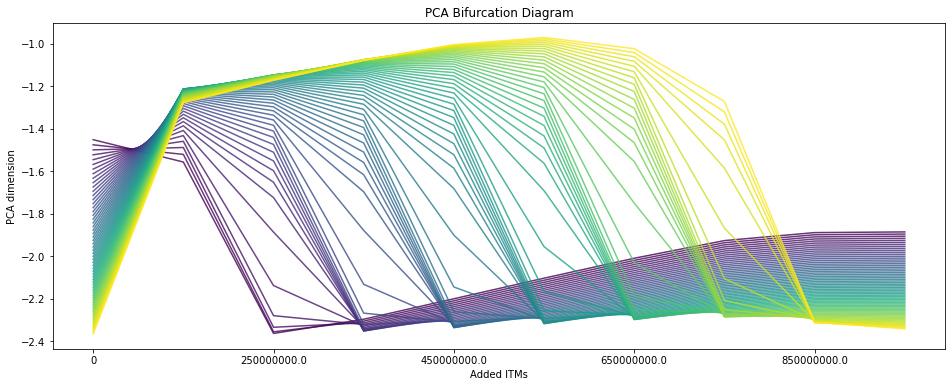

In [359]:
pca_df.T.plot(
          figsize = (16,6), 
          legend = False, 
          colormap='viridis', 
          alpha = 0.8, 
          title = "PCA Bifurcation Diagram")

plt.xlabel("Added ITMs");
plt.ylabel("PCA dimension");
plt.show()